# The Cost of an Undergraduate Education


####  DataSet comes from National Center of Education State (NCES) Table 330.20 
##### Our dataset includes: 
*  Year:  2013- 2021 
*   State:  All states including District of Columbia 
*   Type:   Private, Public In-State, and Public Out-of-State
*  Lenth:  2-year Associate and 4-year Bachelor
*  Expense: Fees/Tuition  and Room/Board
*  Cost:  Average cost for the particular expenses in USD (United States Dollar)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import os
import matplotlib.cm as cm

warnings.filterwarnings("ignore")

**Import csv file and display initial dataframe**

In [3]:
school_df = pd.read_csv("data_sources/nces330_20.csv")
school_df = school_df.dropna()
school_df = school_df.rename(columns={"Value": "Cost"})
school_df.head(5)



,Year,State,Type,Length,Expense,Cost
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473


In [4]:
unique_schools= (school_df["State"]).unique()
print(unique_schools)


['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [5]:
school_df["State"].value_counts()

Alabama                 71
Montana                 71
New Hampshire           71
New Jersey              71
New Mexico              71
New York                71
North Carolina          71
North Dakota            71
Ohio                    71
Oklahoma                71
Oregon                  71
Pennsylvania            71
Rhode Island            71
South Carolina          71
South Dakota            71
Tennessee               71
Texas                   71
Utah                    71
Vermont                 71
Virginia                71
Washington              71
West Virginia           71
Wisconsin               71
Nebraska                71
Missouri                71
Illinois                71
California              71
Connecticut             71
Arkansas                71
Arizona                 71
Florida                 71
Georgia                 71
Hawaii                  71
Idaho                   71
Mississippi             71
Indiana                 71
Iowa                    71
K

In [6]:
# Get dataset info
school_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     3548 non-null   int64 
 1   State    3548 non-null   object
 2   Type     3548 non-null   object
 3   Length   3548 non-null   object
 4   Expense  3548 non-null   object
 5   Cost     3548 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 166.4+ KB


In [7]:
# Display the description of the dataframe
school_df.describe()

,Year,Cost
count,3548.000000,3548.000000
mean,2016.923337,13027.720124
std,2.553910,8734.568645
min,2013.000000,1225.000000
25%,2015.000000,7756.750000
50%,2017.000000,10203.500000
75%,2019.000000,14830.750000
max,2021.000000,49152.000000


In [8]:
# Get the dimension of the dataframe
school_df.shape
# Check for the missing values in the dataset
school_df.isna().sum()


Year       0
State      0
Type       0
Length     0
Expense    0
Cost       0
dtype: int64

In [9]:
state_codes = {"Alabama": "AL", "Montana": "MT", "New Hampshire": "NH", "New Jersey": "NJ",
               "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND",
               "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", 
               "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD", "Tennessee": "TN",
               "Texas": "TX", "Utah": "UT", "Vermont": "VT", "Virginia": "VA", 
               "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Nebraska": "NE",
               "Missouri": "MO", "Illinois": "IL", "California": "CA", "Connecticut": "CT",
               "Arkansas": "AR", "Arizona": "AZ", "Florida": "FL", "Georgia": "GA",
               "Hawaii": "HI", "Idaho": "ID", "Mississippi": "MS", "Indiana": "IN",
               "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
               "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI",
               "Minnesota": "MN", "Colorado": "CO", "Nevada": "NV", "Alaska": "AK",
               "Delaware": "DE", "Wyoming": "WY", "District of Columbia": "DC"}

school_df["State Code"] = school_df["State"].map(state_codes)

**Create seperate dataframes for fees/tuition and room/board. Create frames for 3 year period**

In [10]:
fees_tuition_data = school_df[school_df["Expense"].str.lower().str.contains("fees/tuition")]
fees_tuition_data["Expense"] = fees_tuition_data["Expense"].str.replace("Room/Board", "")
fees_tuition_data.reset_index(drop = True, inplace = True)

room_board_data = school_df[school_df["Expense"].str.lower().str.contains("room/board")]
room_board_data["Expense"] = room_board_data["Expense"].str.replace("Fees/Tuition", "")
room_board_data.reset_index(drop = True, inplace = True)

fees_tuition_data_2019 = fees_tuition_data[fees_tuition_data["Year"] == 2019]


**Further separate frames into private and public institutions, three years**

In [11]:
school_private_2021 = fees_tuition_data[fees_tuition_data["Type"] == "Private"].groupby(["State"]).max()
school_private_2021 = school_private_2021.sort_values(by="Cost")
school_private_2021 = school_private_2021[school_private_2021["Year"] == 2021]
del school_private_2021["Year"]

school_public_2021 = fees_tuition_data[fees_tuition_data["Type"] != "Private"].groupby(["State"]).max()
school_public_2021 = school_public_2021.sort_values(by="Cost")
school_public_2021 = school_public_2021[school_public_2021["Year"] == 2021]
del school_public_2021["Year"]

In [12]:
school_private_2019 = fees_tuition_data_2019[fees_tuition_data_2019["Type"] == "Private"].groupby(["State"]).max()
school_private_2019 = school_private_2019.sort_values(by="Cost")

school_public_2019 = fees_tuition_data_2019[fees_tuition_data_2019["Type"] != "Private"].groupby(["State"]).max()
school_public_2019 = school_public_2019.sort_values(by="Cost")

**Finally, grab the differences between two and four year costs, 2021 and 2019**

In [13]:
school_twoyear = fees_tuition_data[fees_tuition_data["Length"] == "2-year"].groupby(["State"]).max()
school_twoyear = school_twoyear.sort_values(by="Cost")
school_twoyear = school_twoyear[school_twoyear["Year"] == 2021]
del school_twoyear["Year"]

school_twoyear_2019 = fees_tuition_data_2019[fees_tuition_data_2019["Length"] == "2-year"].groupby(["State"]).max()
school_twoyear_2019 = school_twoyear_2019.sort_values(by="Cost")
del school_twoyear_2019["Year"]

school_fouryear_public_2021 = school_public_2021[school_public_2021["Length"] == "4-year"]
school_fouryear_public_2021.head()

school_fouryear_public_2019 = school_public_2019[school_public_2019["Length"] == "4-year"]
del school_fouryear_public_2019["Year"]

## Plot out costs gathered from created DataFrames and compare them to eachother

_
### Plot 2019 and 2021 cost of 4 year public and private education
_

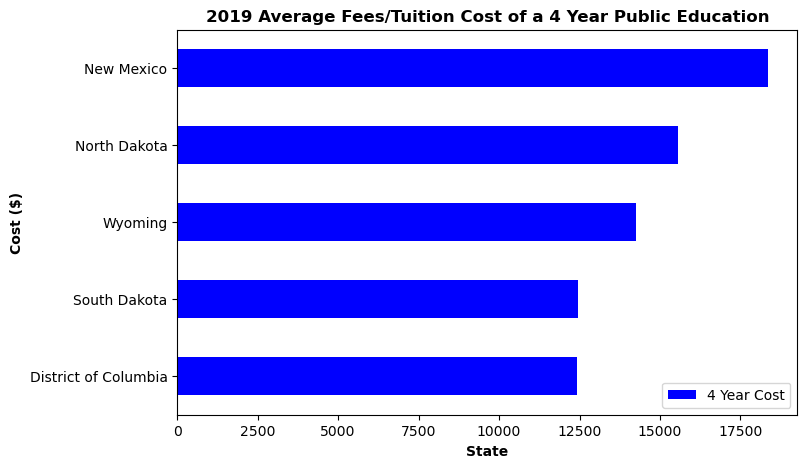

In [47]:
school_fouryear_public_2019[:5].plot.barh(figsize=(8, 5), color="Blue")
plt.legend(labels=["4 Year Cost"])
plt.title("2019 Average Fees/Tuition Cost of a 4 Year Public Education",
          fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.savefig(os.path.join("output", "public_2019.png"))
plt.show()


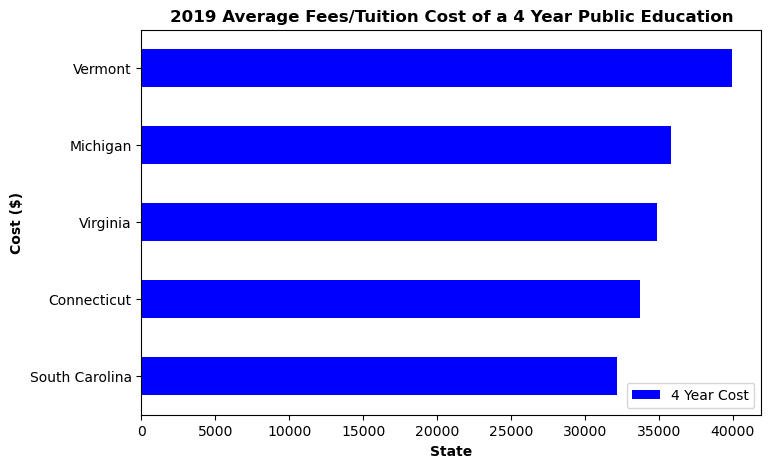

In [48]:
school_fouryear_public_2019[46:].plot.barh(figsize=(8, 5), color="blue")
plt.legend(labels=["4 Year Cost"])
plt.title("2019 Average Fees/Tuition Cost of a 4 Year Public Education",
          fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.savefig(os.path.join("output", "public_2019.png"))
plt.show()


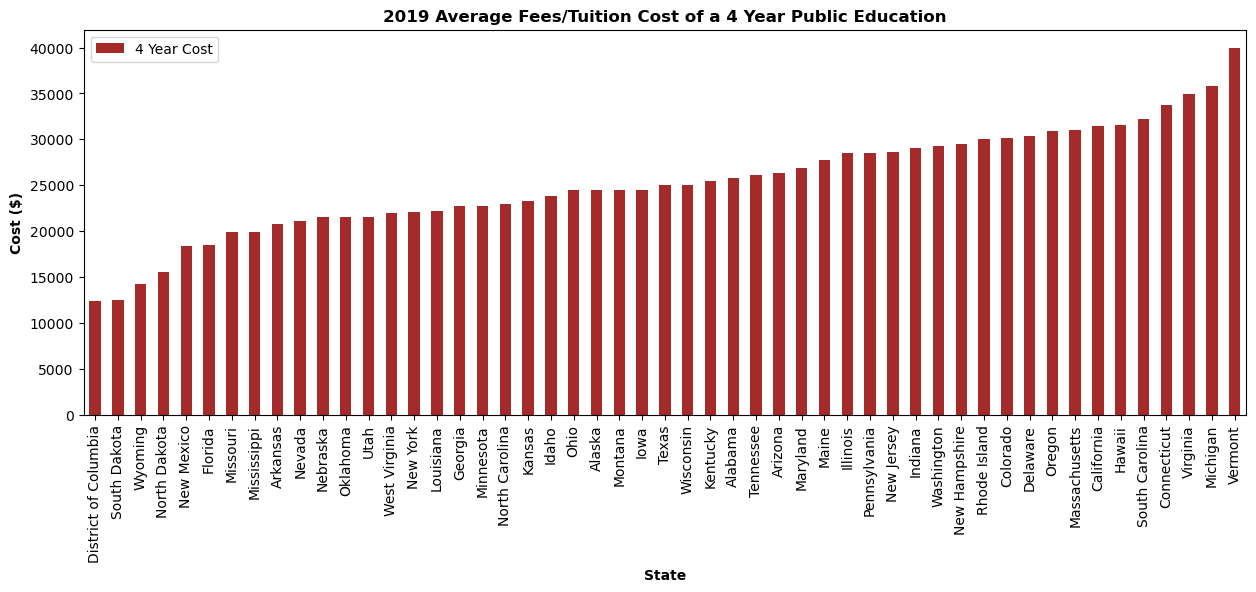

In [16]:
school_fouryear_public_2019.plot.bar(figsize = (15  ,5), color="brown")
plt.legend(labels=["4 Year Cost"])
plt.title("2019 Average Fees/Tuition Cost of a 4 Year Public Education", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.savefig(os.path.join("output", "public_2019.png"))
plt.show()

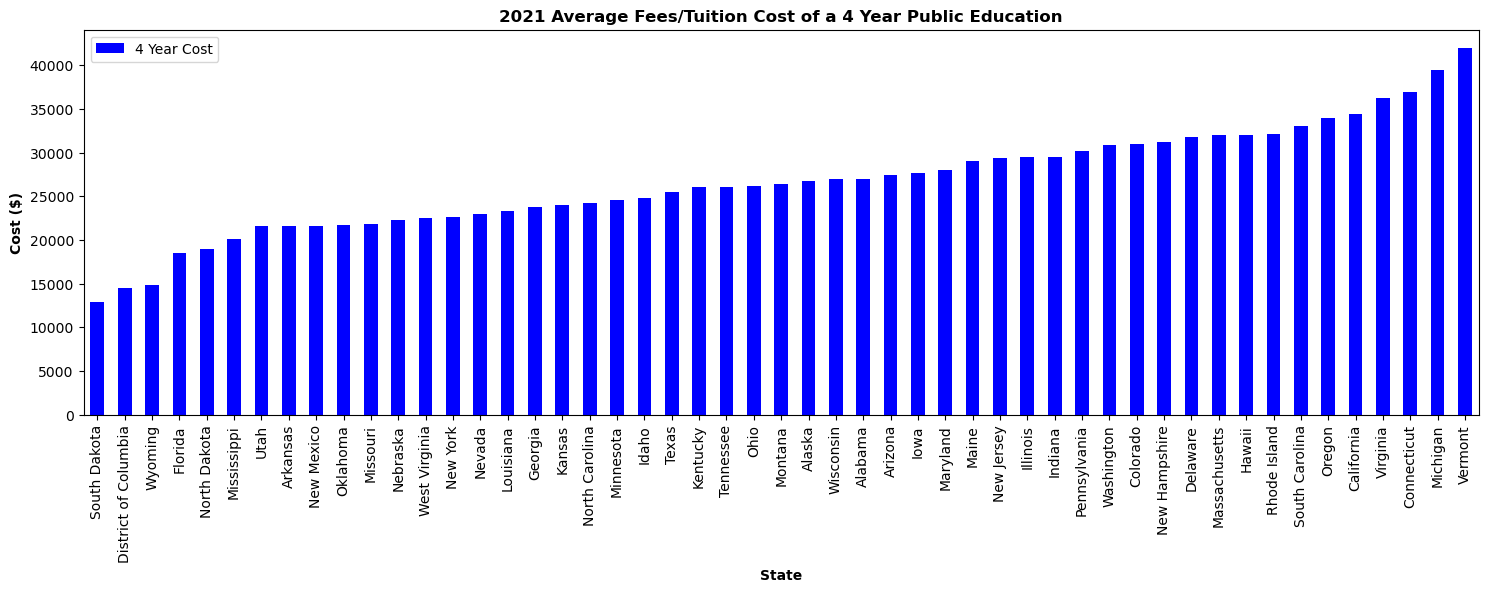

In [17]:
school_fouryear_public_2021.plot.bar(figsize = (18,5), color="blue")
plt.legend(labels=["4 Year Cost"])
plt.title("2021 Average Fees/Tuition Cost of a 4 Year Public Education", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.savefig(os.path.join("output", "public_2021.png"))
plt.show()

In [18]:
combined_for_plot_2021 = pd.merge(school_fouryear_public_2019, school_fouryear_public_2021, on=[
                                  "State", "State Code", "Length", "Expense", "Type"])
combined_for_plot_2021 = combined_for_plot_2021.rename(columns={"Cost_x": "Cost 2019",
                                                                "Cost_y": "Cost 2021",
                                                                })
combined_for_plot_2021["Tuition_Diff_2021-2019"] = combined_for_plot_2021["Cost 2021"] - \
    combined_for_plot_2021["Cost 2019"]
combined_for_plot_2021["% Tuition Increase 2019-2021"] = (
    combined_for_plot_2021["Tuition_Diff_2021-2019"] / combined_for_plot_2021["Cost 2019"])*100
combined_for_plot_2021




,Type,Length,Expense,Cost 2019,State Code,Cost 2021,Tuition_Diff_2021-2019,% Tuition Increase 2019-2021
State,,,,,,,,
District of Columbia,Public Out-of-State,4-year,Fees/Tuition,12416,DC,14540,2124,17.106959
South Dakota,Public Out-of-State,4-year,Fees/Tuition,12465,SD,12924,459,3.682310
Wyoming,Public Out-of-State,4-year,Fees/Tuition,14268,WY,14803,535,3.749650
North Dakota,Public Out-of-State,4-year,Fees/Tuition,15565,ND,19021,3456,22.203662
New Mexico,Public Out-of-State,4-year,Fees/Tuition,18350,NM,21645,3295,17.956403
Florida,Public Out-of-State,4-year,Fees/Tuition,18456,FL,18514,58,0.314261
Missouri,Public Out-of-State,4-year,Fees/Tuition,19914,MO,21880,1966,9.872452
Mississippi,Public Out-of-State,4-year,Fees/Tuition,19942,MS,20160,218,1.093170
Arkansas,Public Out-of-State,4-year,Fees/Tuition,20825,AR,21598,773,3.711885


##  "Percenatage Variance from 2019 to 2021 Public out of state 4 years"

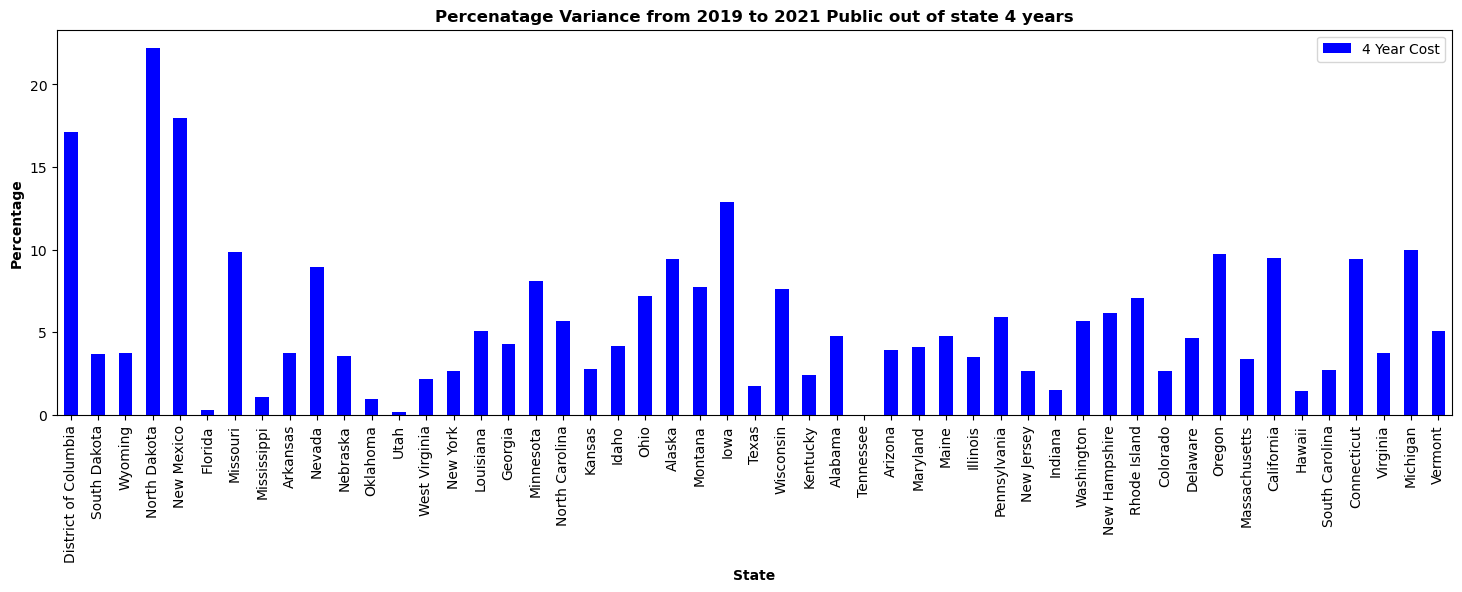

In [19]:
combined_for_plot_2021["% Tuition Increase 2019-2021"].plot.bar(figsize=(18, 5), color="blue")
plt.legend(labels=["4 Year Cost"])
plt.title("Percenatage Variance from 2019 to 2021 Public out of state 4 years",
          fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Percentage", fontweight="bold")
#plt.text(combined_for_plot_2021["% Tuition Increase 2019-2021"])

# plt.savefig(os.path.join("output", "public_2021.png"))
plt.show()


In [20]:
combined_for_plot_2021 = pd.merge(school_fouryear_public_2019, school_fouryear_public_2021, on=["State", "State Code", "Length", "Expense", "Type"])
combined_for_plot_2021 = combined_for_plot_2021.rename(columns={"Cost_x": "Cost 2019", 
                                                                "Cost_y": "Cost 2021",
                                                                })
combined_for_plot_2021.head()

,Type,Length,Expense,Cost 2019,State Code,Cost 2021
State,,,,,,
District of Columbia,Public Out-of-State,4-year,Fees/Tuition,12416,DC,14540
South Dakota,Public Out-of-State,4-year,Fees/Tuition,12465,SD,12924
Wyoming,Public Out-of-State,4-year,Fees/Tuition,14268,WY,14803
North Dakota,Public Out-of-State,4-year,Fees/Tuition,15565,ND,19021
New Mexico,Public Out-of-State,4-year,Fees/Tuition,18350,NM,21645


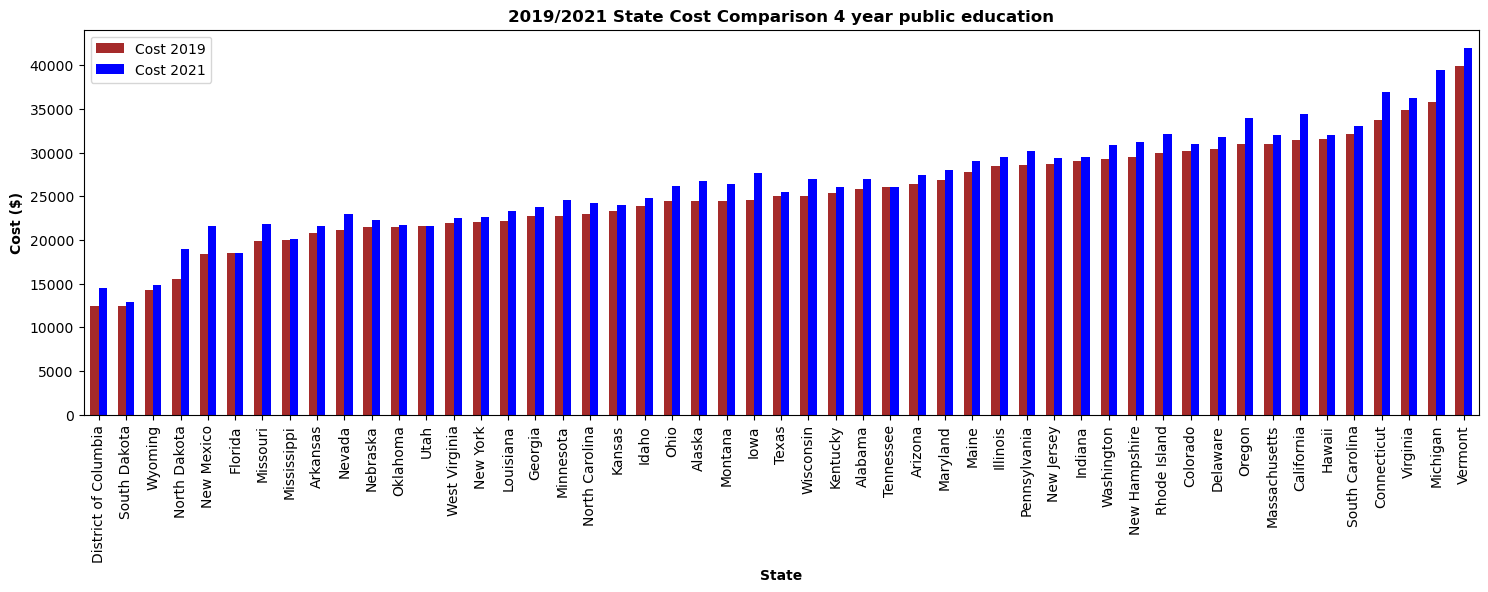

In [21]:
combined_for_plot_2021.plot.bar(figsize = (18, 5), color=["brown", "blue"], width = 0.6)
plt.title("2019/2021 State Cost Comparison 4 year public education", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.savefig(os.path.join("output", "four_comparison_2019_2021.png"))
plt.show()

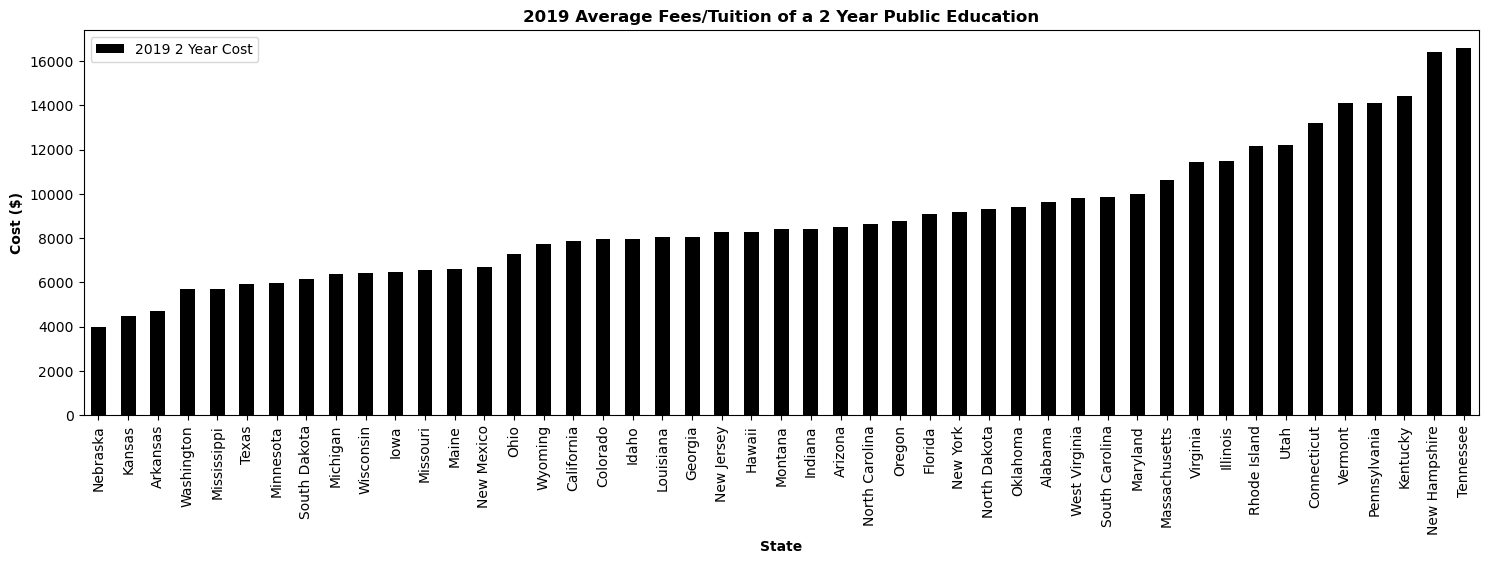

In [22]:
school_twoyear_2019.plot.bar(figsize = (18,5), color="black")
plt.legend(labels=["2019 2 Year Cost"])
plt.title("2019 Average Fees/Tuition of a 2 Year Public Education", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.savefig(os.path.join("output", "two_year_public_2019.png"))
plt.show()

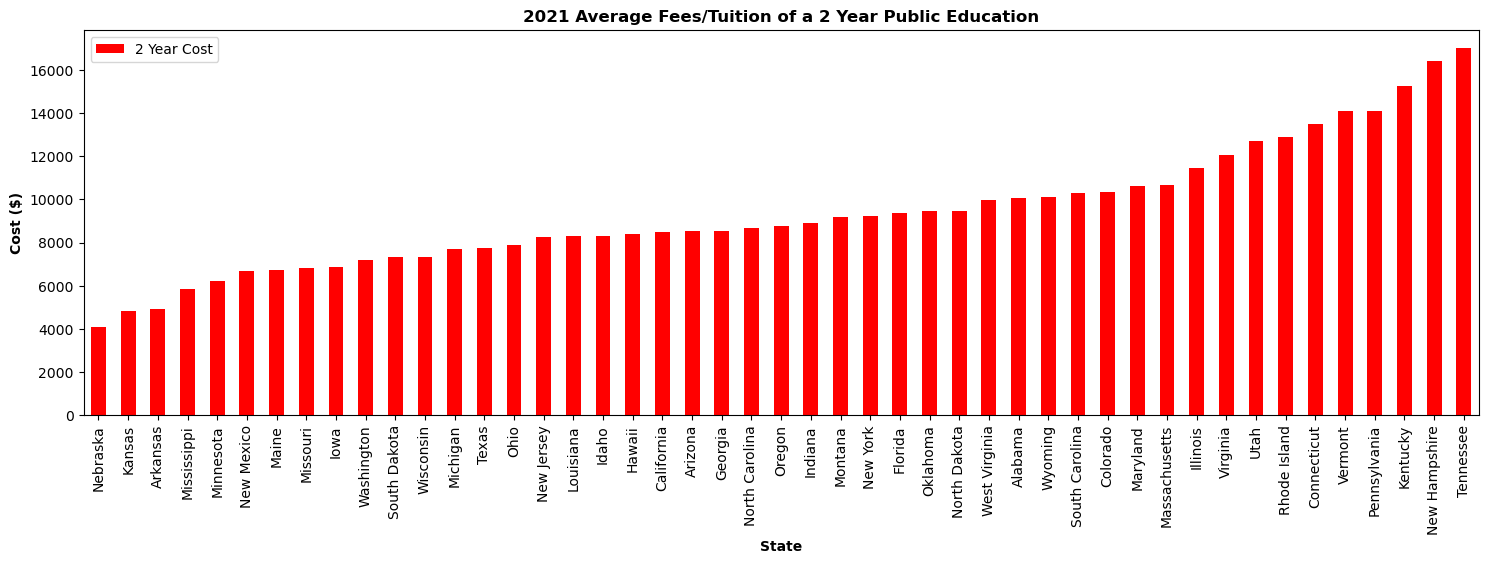

In [23]:
school_twoyear.plot.bar(figsize = (18,5), color="red")
plt.legend(labels=["2 Year Cost"])
plt.title("2021 Average Fees/Tuition of a 2 Year Public Education", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.savefig(os.path.join("output", "two_year_public_2021.png"))
plt.show()

**Combine 2year dataframes to make comparison chart**

In [24]:
combined_for_plot_2year = pd.merge(school_twoyear_2019, school_twoyear, on=["State", "State Code", "Length", "Expense", "Type"])
combined_for_plot_2year = combined_for_plot_2year.rename(columns={"Cost_x": "Cost 2019", 
                                                                "Cost_y": "Cost 2021",
                                                                })
combined_for_plot_2year.head()

,Type,Length,Expense,Cost 2019,State Code,Cost 2021
State,,,,,,
Nebraska,Public Out-of-State,2-year,Fees/Tuition,3985,NE,4101
Kansas,Public Out-of-State,2-year,Fees/Tuition,4491,KS,4828
Arkansas,Public Out-of-State,2-year,Fees/Tuition,4698,AR,4905
Washington,Public Out-of-State,2-year,Fees/Tuition,5691,WA,7186
Mississippi,Public Out-of-State,2-year,Fees/Tuition,5709,MS,5835


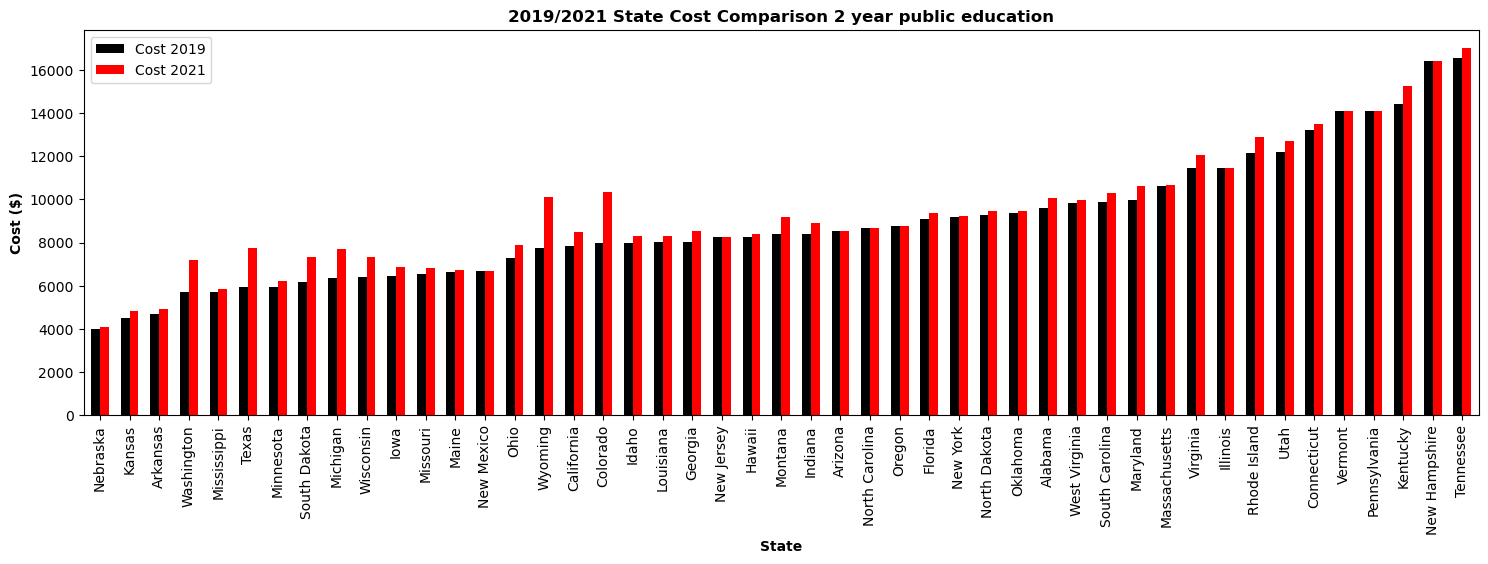

In [25]:
combined_for_plot_2year.plot.bar(figsize = (18, 5), color=["black", "red"], width = 0.6)
plt.title("2019/2021 State Cost Comparison 2 year public education", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.savefig(os.path.join("output", "two_comparison_2019_2021.png"))
plt.show()

_
### Plots to compare 2021 plot data to eachother to see differences in education cost per state
_

In [26]:
combined_for_plot = pd.merge(school_fouryear_public_2021, school_twoyear, on="State")
combined_for_plot = combined_for_plot.rename(columns={"Cost_x": "4 Year Cost", "Cost_y": "2 Year Cost"})

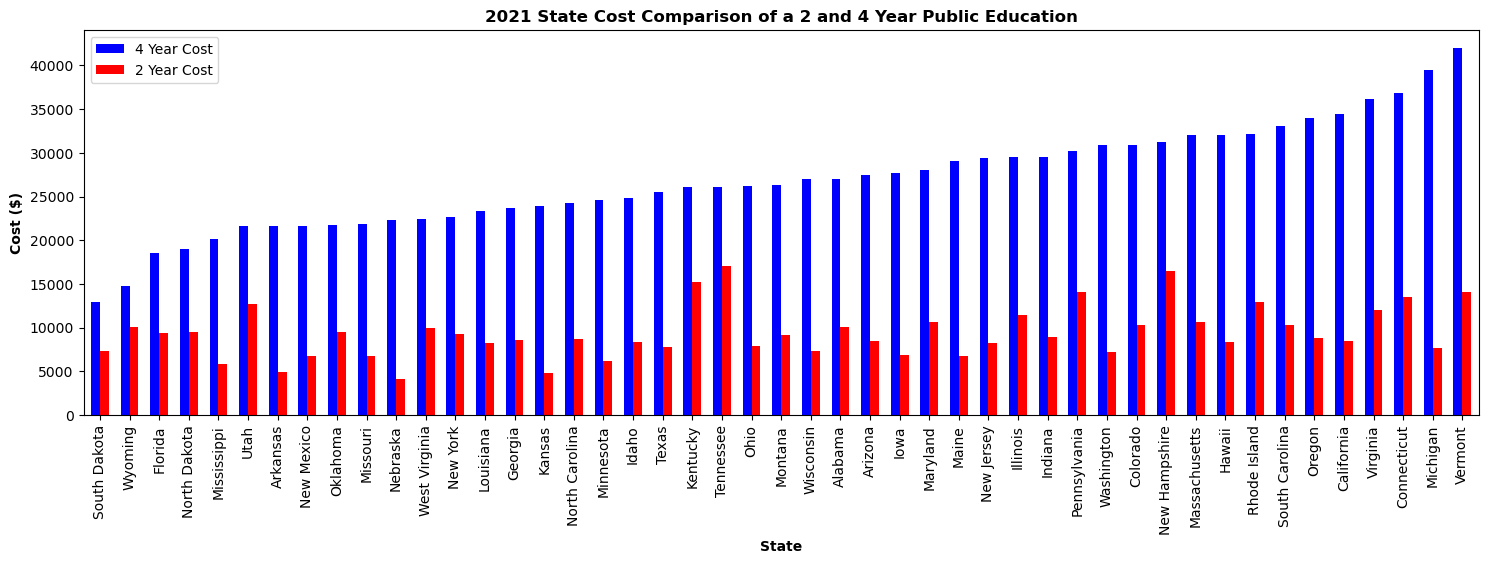

In [27]:
combined_for_plot.plot.bar(figsize = (18, 5), color=["blue", "red"], width = 0.6)
plt.title("2021 State Cost Comparison of a 2 and 4 Year Public Education", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.savefig(os.path.join("output", "two_four_comparison.png"))
plt.show()

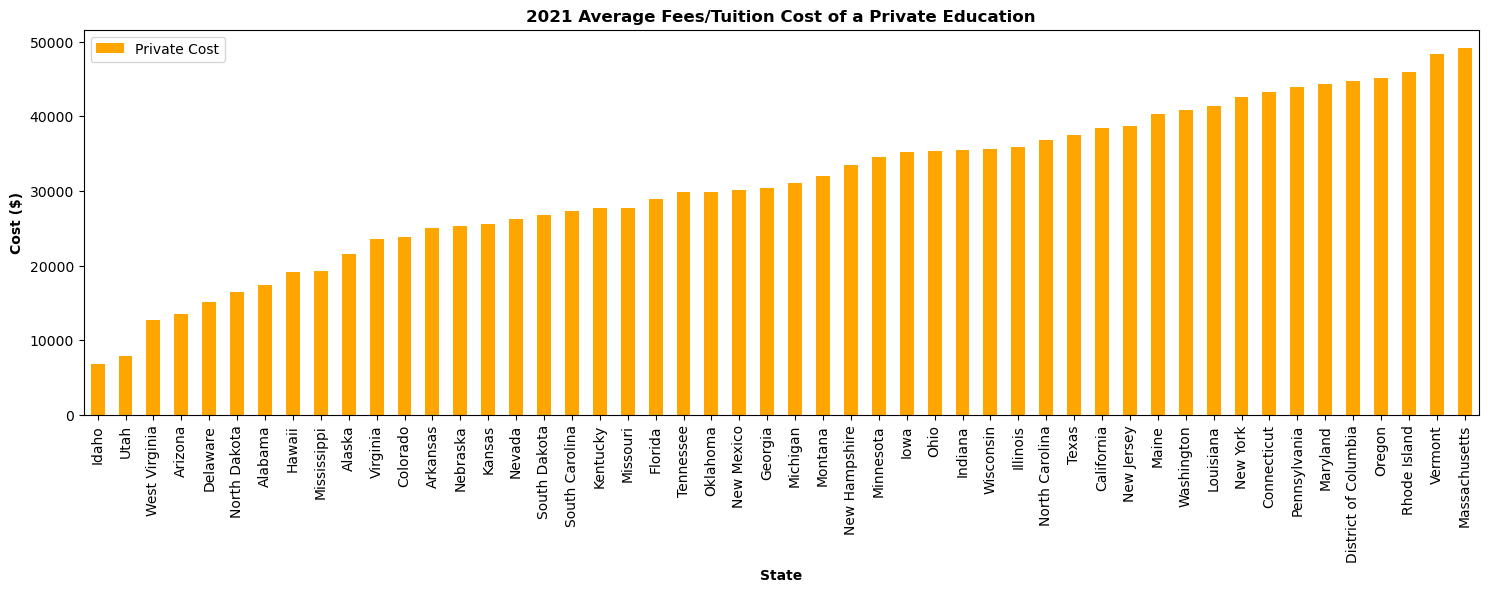

In [28]:
school_private_2021.plot.bar(figsize = (18, 5), color = "orange")
plt.legend(labels=["Private Cost"])
plt.title("2021 Average Fees/Tuition Cost of a Private Education", fontweight = "bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.savefig(os.path.join("output", "private.png"))
plt.show()

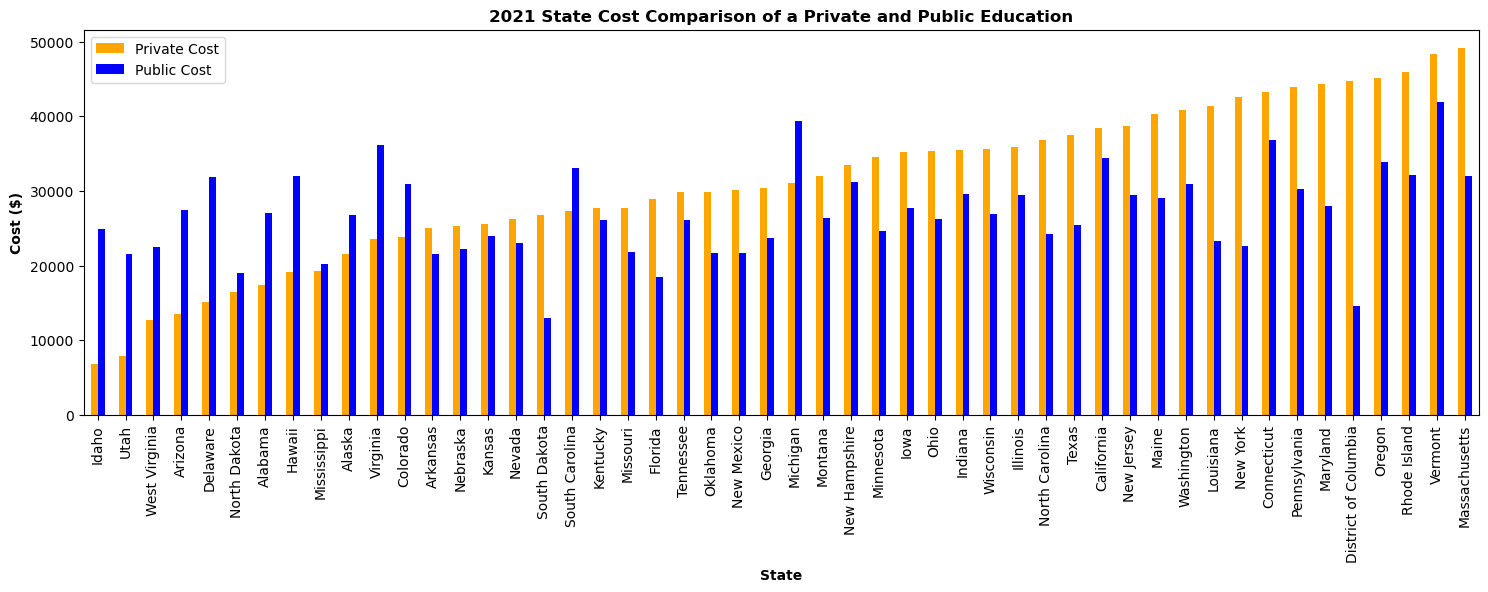

In [29]:
df_combined = pd.concat([school_private_2021, school_fouryear_public_2021], axis=1)
df_combined = df_combined.dropna()
df_combined.plot.bar(figsize = (18, 5), color = ["orange", "blue"])
plt.legend(labels=["Private Cost", "Public Cost"])
plt.title("2021 State Cost Comparison of a Private and Public Education", fontweight = "bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.savefig(os.path.join("output", "private_public_comparison.png"))
plt.show()

### Add Heatmaps showing a nice visual for where most expensive states are

In [30]:
fig = px.choropleth(school_fouryear_public_2021,
                    locations = "State Code",
                    locationmode = "USA-states",
                    scope = "usa",
                    color = "Cost",
                    color_continuous_scale = "PuBu",
                    template = "seaborn",
                    title = "2021 Map of Fees/Tuition per state (Public 4-Year)",
                    width = 800,
                    height = 600,
                    labels = {"Cost": "Cost ($)"}
    )
fig.show()

In [31]:
fig = px.choropleth(school_private_2021,
                    locations = "State Code",
                    locationmode = "USA-states",
                    scope = "usa",
                    color = "Cost",
                    color_continuous_scale="PuBu",
                    template = "seaborn",
                    title = "2021 Map of Fees/Tuition per state (Private 4-Year)",
                    width = 800,
                    height = 600,
                    labels = {"Cost": "Cost ($)"}
    )
fig.show()

In [32]:
### NA suggest tov work on visualization of > the average cost of undergraduate / type

type_avg_cost = school_df.groupby('Type').mean(numeric_only=True)


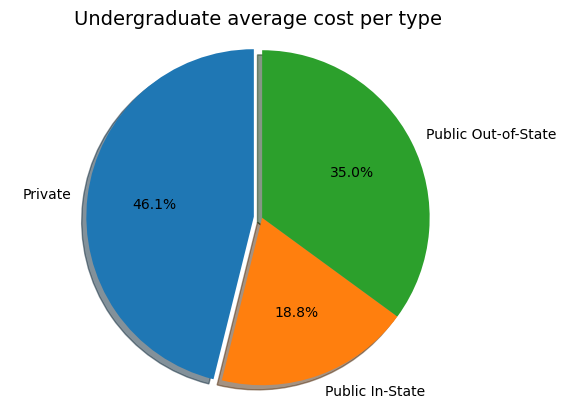

In [33]:
### NA Create the pie plot
# Plot the pie chart
explode = (0.05, .0, .0)
plt.pie(type_avg_cost['Cost'], labels=type_avg_cost.index,
        autopct='%1.1f%%', shadow=True, startangle=90, explode=explode)
plt.axis('equal')
plt.title('Undergraduate average cost per type', fontsize=14)
plt.show()


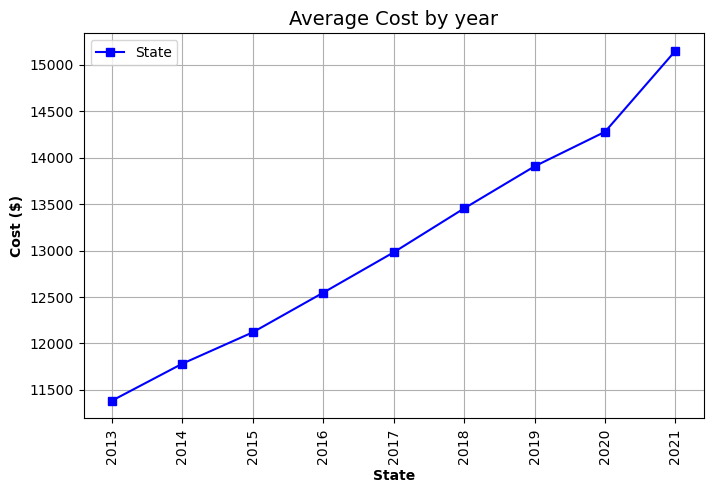

In [34]:
avg_year_cost = school_df.groupby('Year').mean(numeric_only=True)
plt.figure(figsize=(8, 5))
plt.plot(avg_year_cost.index, avg_year_cost['Cost'], marker="s", color="blue")
plt.legend(['State'], loc='upper left', fontsize=10)
plt.xlabel('State', fontweight="bold")
plt.ylabel('Cost ($)', fontweight="bold")
plt.title('Average Cost by year', fontsize=14)
plt.xticks(rotation=90)
plt.grid()
plt.show()
# avg_year_cost


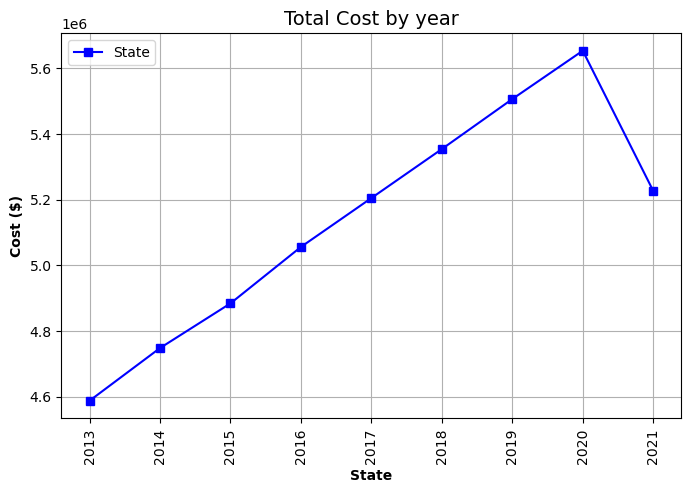

In [35]:
avg_year_cost = school_df.groupby('Year').sum(numeric_only=True)
plt.figure(figsize=(8, 5))
plt.plot(avg_year_cost.index, avg_year_cost['Cost'], marker="s", color="blue")
plt.legend(['State'], loc='upper left', fontsize=10)
plt.xlabel('State', fontweight="bold")
plt.ylabel('Cost ($)', fontweight="bold")
plt.title('Total Cost by year', fontsize=14)
plt.xticks(rotation=90)
plt.grid()
plt.show()
# avg_year_cost


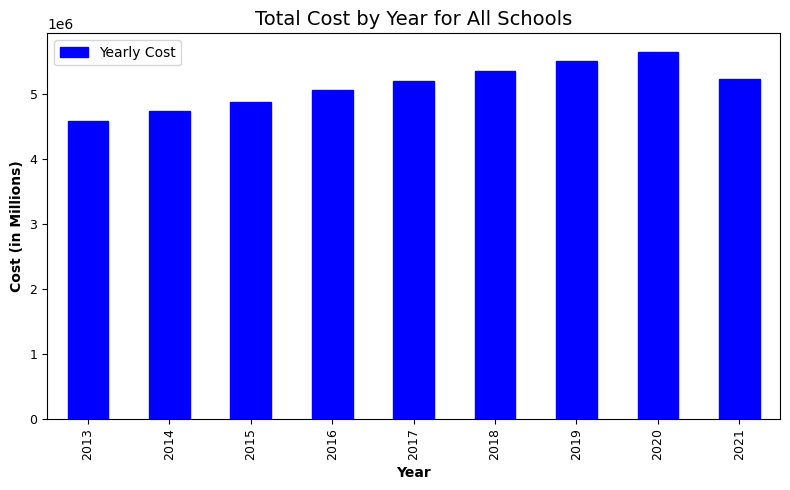

In [36]:
group_year_cost = school_df.groupby(["Year"]).sum()
colors = ["blue"]
group_year_cost.plot(kind="bar", figsize=(8, 5), color=colors,
                     fontsize=9, edgecolor='blue',  align="center")
# plt.rcParams["figure.facecolor"]
# plt.label("Cost")
plt.legend(['Yearly Cost'], loc='upper left', fontsize=10)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Cost (in Millions)", fontweight="bold")
plt.title("Total Cost by Year for All Schools", fontsize=14)
plt.tight_layout()
plt.show()
# print(group_year_cost)


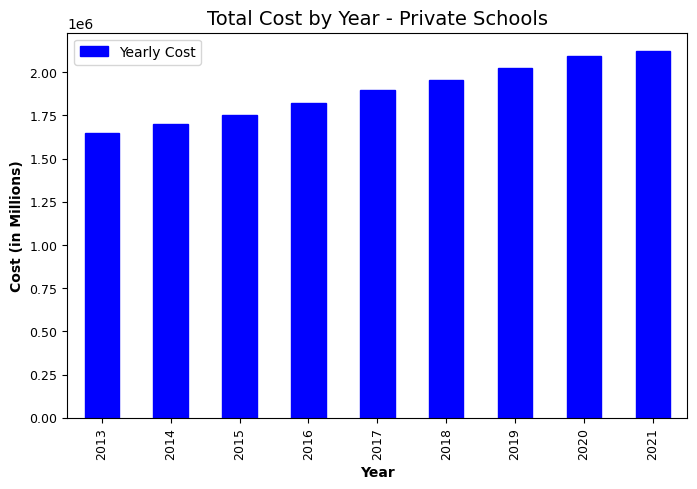

In [37]:
# type_cost_year = school_df.groupby(["State","Year","Type"])
type_private = school_df[(school_df["Type"] == "Private")]
private_group_year_cost = type_private.groupby(["Year"]).sum()
colors = ["blue"]
private_group_year_cost.plot(kind="bar", figsize=(8, 5), color=colors,
                             fontsize=9, edgecolor='blue',  align="center")
plt.rcParams["figure.facecolor"]
# plt.label("Cost")
plt.legend(['Yearly Cost'], loc='upper left', fontsize=10)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Cost (in Millions)", fontweight="bold")
plt.title("Total Cost by Year - Private Schools", fontsize=14)
# plt.tight_layout()
plt.show()
# private_group_year_cost


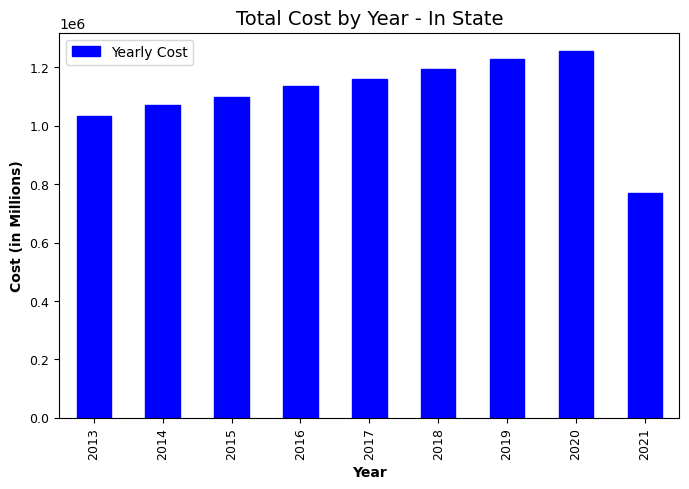

In [38]:
type_in_state = school_df[(school_df["Type"] == "Public In-State")]
type_in_state_group = type_in_state.groupby(["Year"]).sum()
colors = ["blue"]
type_in_state_group.plot(kind="bar", figsize=(8, 5), color=colors,
                         fontsize=9, edgecolor='blue',  align="center")
plt.rcParams["figure.facecolor"]
# plt.label("Cost")
plt.legend(['Yearly Cost'], loc='upper left', fontsize=10)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Cost (in Millions)", fontweight="bold")
plt.title("Total Cost by Year - In State", fontsize=14)
# plt.tight_layout()
plt.show()
# type_in_state_group


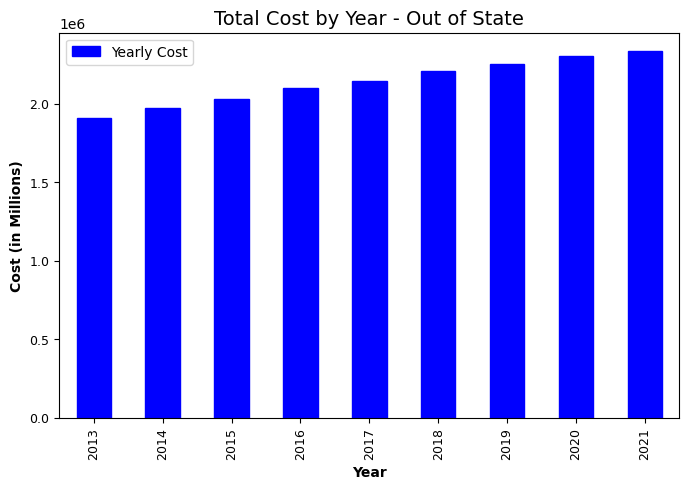

In [39]:
type_out_state = school_df[(school_df["Type"] == "Public Out-of-State")]
type_out_state_group = type_out_state.groupby(["Year"]).sum()
colors = ["blue"]
type_out_state_group.plot(kind="bar", figsize=(8, 5), color=colors,
                          fontsize=9, edgecolor='blue',  align="center")
# plt.rcParams["figure.facecolor"]
# plt.label("Cost")
plt.legend(['Yearly Cost'], loc='upper left', fontsize=10)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Cost (in Millions)", fontweight="bold")
plt.title("Total Cost by Year - Out of State", fontsize=14)
# plt.tight_layout()
plt.show()
# type_out_state_group


In [40]:
school_df

,Year,State,Type,Length,Expense,Cost,State Code
0,2013,Alabama,Private,4-year,Fees/Tuition,13983,AL
1,2013,Alabama,Private,4-year,Room/Board,8503,AL
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048,AL
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073,AL
4,2013,Alabama,Public In-State,4-year,Room/Board,8473,AL
...,...,...,...,...,...,...,...
3543,2021,Wyoming,Public In-State,2-year,Fees/Tuition,3987,WY
3544,2021,Wyoming,Public In-State,4-year,Room/Board,9799,WY
3545,2021,Wyoming,Public Out-of-State,2-year,Fees/Tuition,9820,WY
3546,2021,Wyoming,Public Out-of-State,4-year,Fees/Tuition,14710,WY


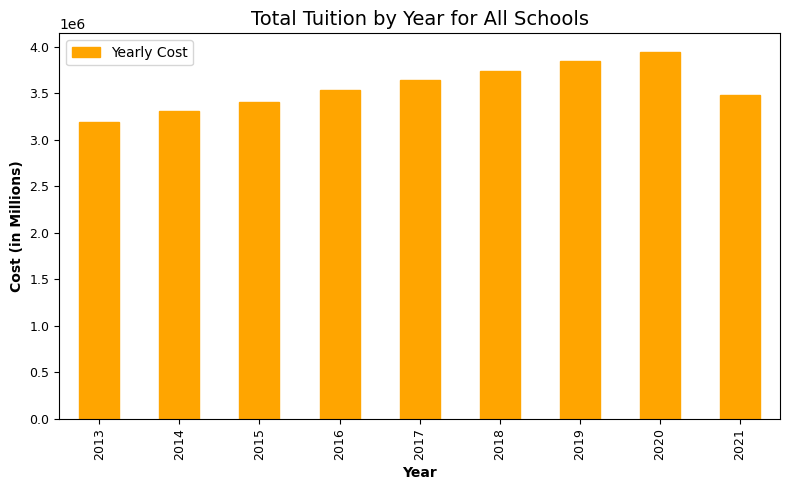

In [41]:
group_year_cost = fees_tuition_data.groupby(["Year"]).sum()
colors = ["orange","yellow"]
group_year_cost.plot(kind="bar", figsize=(8, 5), color=colors,
                     fontsize=9, edgecolor='orange',  align="center")
# plt.rcParams["figure.facecolor"]
# plt.label("Cost")
plt.legend(['Yearly Cost'], loc='upper left', fontsize=10)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Cost (in Millions)", fontweight="bold")
plt.title("Total Tuition by Year for All Schools", fontsize=14)
plt.tight_layout()
plt.show()
# print(group_year_cost)


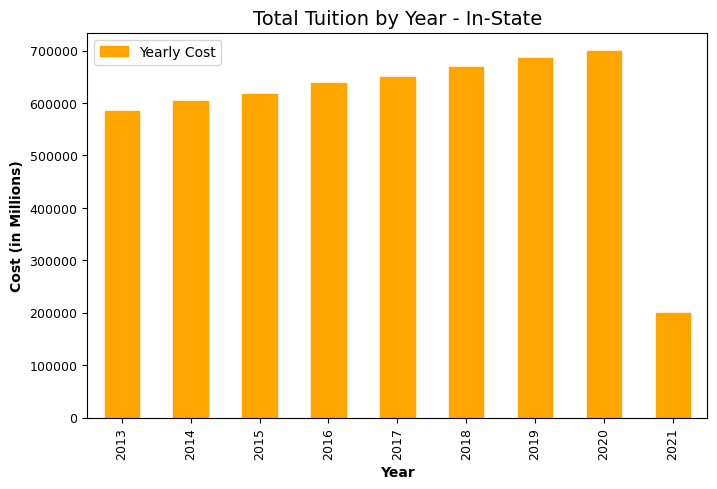

,Cost
Year,
2013,583784
2014,603331
2015,617475
2016,638230
2017,649992
2018,667891
2019,684822
2020,698985
2021,200450


In [42]:

type_in_state = fees_tuition_data[(
    fees_tuition_data["Type"] == "Public In-State")]
type_out_state_group = type_in_state.groupby(["Year"]).sum()
colors = ["orange"]
type_out_state_group.plot(kind="bar", figsize=(8, 5), color=colors,
                          fontsize=9, edgecolor='orange',  align="center")
# plt.rcParams["figure.facecolor"]
# plt.label("Cost")
plt.legend(['Yearly Cost'], loc='upper left', fontsize=10)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Cost (in Millions)", fontweight="bold")
plt.title("Total Tuition by Year - In-State", fontsize=14)
# plt.tight_layout()
plt.show()
type_out_state_group


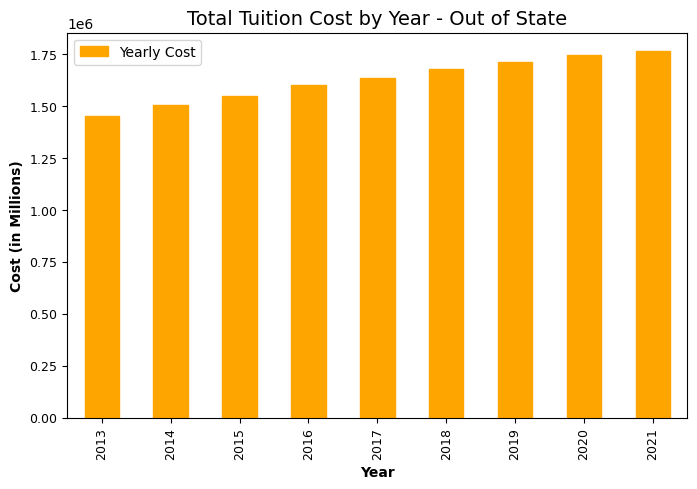

,Cost
Year,
2013,1454137
2014,1506045
2015,1548794
2016,1602916
2017,1633045
2018,1679858
2019,1710248
2020,1746181
2021,1764336


In [43]:
type_out_state = fees_tuition_data[(
    fees_tuition_data["Type"] == "Public Out-of-State")]
type_out_state_group = type_out_state.groupby(["Year"]).sum()
colors = ["orange"]
type_out_state_group.plot(kind="bar", figsize=(8, 5), color=colors,
                          fontsize=9, edgecolor='orange',  align="center")
# plt.rcParams["figure.facecolor"]
# plt.label("Cost")
plt.legend(['Yearly Cost'], loc='upper left', fontsize=10)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Cost (in Millions)", fontweight="bold")
plt.title("Total Tuition Cost by Year - Out of State", fontsize=14)
# plt.tight_layout()
plt.show()
type_out_state_group


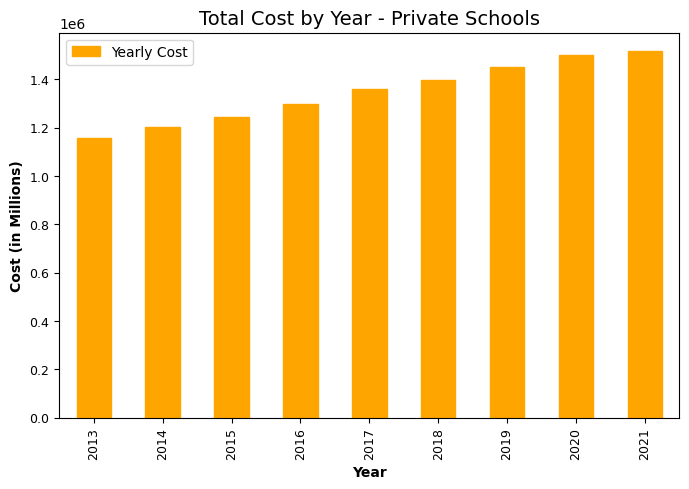

,Cost
Year,
2013,1157639
2014,1201787
2015,1244483
2016,1298720
2017,1359626
2018,1396226
2019,1452970
2020,1502365
2021,1517395


In [44]:
# type_cost_year = school_df.groupby(["State","Year","Type"])
type_private = fees_tuition_data[(fees_tuition_data["Type"] == "Private")]
private_group_year_cost = type_private.groupby(["Year"]).sum()

colors = ("orange")
private_group_year_cost.plot(kind="bar", figsize=(8, 5), color=colors,
                             fontsize=9, edgecolor='orange',  align="center")
plt.rcParams["figure.facecolor"]
# plt.label("Cost")
plt.legend(['Yearly Cost'], loc='upper left', fontsize=10)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Cost (in Millions)", fontweight="bold")
plt.title("Total Cost by Year - Private Schools", fontsize=14)
# plt.tight_layout()
plt.show()
private_group_year_cost


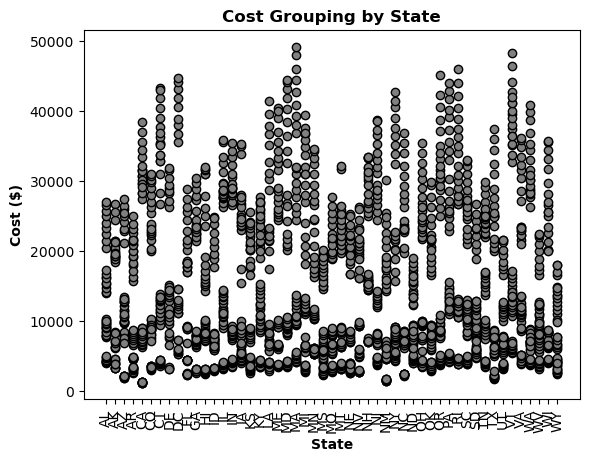

In [52]:

plt.scatter(fees_tuition_data["State Code"], fees_tuition_data["Cost"], 
            marker="o", facecolors="grey", edgecolors="black")
plt.xticks(rotation="vertical")
plt.title("Cost Grouping by State",
          fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.xlabel("State", fontweight="bold")
# plt.figure(figsize=(20, 4))
plt.show()



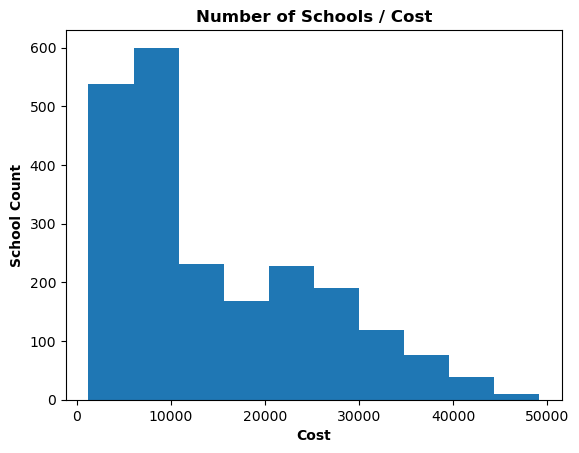

In [46]:
plt.hist(fees_tuition_data["Cost"])
 
plt.title("Number of Schools / Cost",
          fontweight="bold")
plt.ylabel("School Count", fontweight="bold")
plt.xlabel("Cost", fontweight="bold")
# plt.savefig(os.path.join("output", "four_comparison_2019_2021.png"))
plt.show()
